In [1]:
from datetime import datetime
import time 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'JumpRope.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print(f"Number of rows: {len(df1)}")
print(f"Number of columns: {len(df1.columns)}")

print("\nData from", file_name)
print(df1)

Number of rows: 2902
Number of columns: 14

Data from JumpRope.csv
      ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                    -0.9433                  5.0015                  8.5042   
1                     1.5419                 -7.6231                  5.0613   
2                    -3.6392                 -3.8355                  7.0725   
3                    -0.6991                 -5.3534                 -3.6727   
4                    -3.1699                 -9.1889                 -0.6776   
...                      ...                     ...                     ...   
2897                 -0.3517                  4.1952                 10.2541   
2898                  0.3772                  5.2355                  8.9004   
2899                 -0.7433                  5.0569                  7.7381   
2900                 -0.1923                  5.3258                  6.6033   
2901                  1.6463                  6.9688 

In [3]:
print(df1.columns)

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)',
       'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)',
       'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)',
       'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)',
       'Time since start in ms ', 'YYYY-MO-DD HH-MI-SS_SSS'],
      dtype='object')


Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
YYYY-MO-DD HH-MI-SS_SSS         0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2902.000000             2902.000000             2902.000000   
mean                 2.035383              -11.097972                2.514518   
std                  6.325627               16.160024                5.567274   
min                -55.862500              -78.443600              -44.066800   
25%                  0.252400              -21.949

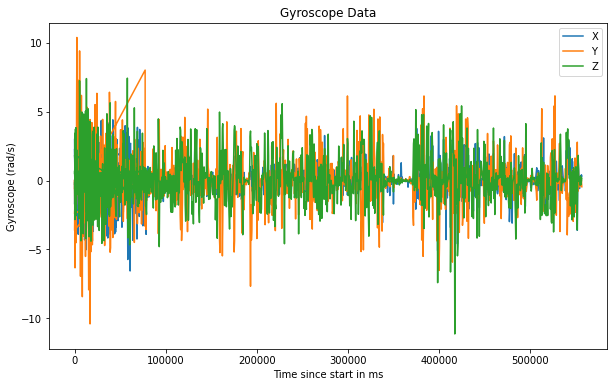

In [4]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'JumpRope.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

plt.figure(figsize=(10, 6))
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE X (rad/s)'], label='X')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Y (rad/s)'], label='Y')
plt.plot(df1['Time since start in ms '], df1['GYROSCOPE Z (rad/s)'], label='Z')
plt.xlabel('Time since start in ms')
plt.ylabel('Gyroscope (rad/s)')
plt.title('Gyroscope Data')
plt.legend()
plt.show()

In [5]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'JumpRope.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').values.astype(np.int64) // 1000

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

print("Missing values in each column:")
print(df1.isnull().sum())

print("\nDescriptive statistics:")
print(df1.describe())

Missing values in each column:
ACCELEROMETER X (m/s²)          0
ACCELEROMETER Y (m/s²)          0
ACCELEROMETER Z (m/s²)          0
GRAVITY X (m/s²)                0
GRAVITY Y (m/s²)                0
GRAVITY Z (m/s²)                0
LINEAR ACCELERATION X (m/s²)    0
LINEAR ACCELERATION Y (m/s²)    0
LINEAR ACCELERATION Z (m/s²)    0
GYROSCOPE X (rad/s)             0
GYROSCOPE Y (rad/s)             0
GYROSCOPE Z (rad/s)             0
Time since start in ms          0
Timestamp (microseconds)        0
dtype: int64

Descriptive statistics:
       ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
count             2902.000000             2902.000000             2902.000000   
mean                 2.035383              -11.097972                2.514518   
std                  6.325627               16.160024                5.567274   
min                -55.862500              -78.443600              -44.066800   
25%                  0.252400              -21.949

In [6]:
pd.Timestamp(df1['Timestamp (microseconds)'][0], unit='us')

Timestamp('2021-05-14 13:40:01.922000')

In [7]:
folder_path = "Inertia_Sensors_Dataset/"
file_name = 'JumpRope.csv'
file_path = folder_path + file_name

df1 = pd.read_csv(file_path)

print("Original DataFrame:")
print(df1.head())

df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000

print("\nDataFrame with converted timestamps:")
print(df1[['YYYY-MO-DD HH-MI-SS_SSS', 'Timestamp (microseconds)']].head())

df1.drop(columns=['YYYY-MO-DD HH-MI-SS_SSS'], inplace=True)

start = pd.Timestamp(year=2021, month=2, day=19, hour=23, minute=34, second=25, microsecond=292000)
start_ts = int(start.timestamp() * 1e6)

end = pd.Timestamp(year=2021, month=5, day=19, hour=23, minute=35, second=27, microsecond=728000)
end_ts = int(end.timestamp() * 1e6)

DF1 = df1.loc[(df1['Timestamp (microseconds)'] >= start_ts) & (df1['Timestamp (microseconds)'] <= end_ts)]

DF1['Activity_Label'] = 'Jump Rope'

DF1 = DF1[['Timestamp (microseconds)', 'ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 'Activity_Label']]
DF1 = DF1.rename(columns={
    'ACCELEROMETER X (m/s²)': 'Accel X (g)',
    'ACCELEROMETER Y (m/s²)': 'Accel Y (g)',
    'ACCELEROMETER Z (m/s²)': 'Accel Z (g)'
})

DF1.reset_index(drop=True, inplace=True)

print("\nFiltered DataFrame with index column:")
print(DF1)

Original DataFrame:
   ACCELEROMETER X (m/s²)  ACCELEROMETER Y (m/s²)  ACCELEROMETER Z (m/s²)  \
0                 -0.9433                  5.0015                  8.5042   
1                  1.5419                 -7.6231                  5.0613   
2                 -3.6392                 -3.8355                  7.0725   
3                 -0.6991                 -5.3534                 -3.6727   
4                 -3.1699                 -9.1889                 -0.6776   

   GRAVITY X (m/s²)  GRAVITY Y (m/s²)  GRAVITY Z (m/s²)  \
0           -1.1791            4.8282            8.4539   
1           -6.2500            2.8407            7.0027   
2           -6.3912           -7.3865            0.8737   
3           -5.0410           -8.2546            1.6187   
4           -1.4721           -9.6838            0.4775   

   LINEAR ACCELERATION X (m/s²)  LINEAR ACCELERATION Y (m/s²)  \
0                       -0.0982                        0.3029   
1                        7.5590 

/tmp/ipykernel_8143/561052894.py:10: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df1['Timestamp (microseconds)'] = pd.to_datetime(df1['YYYY-MO-DD HH-MI-SS_SSS'], format='%Y-%m-%d %H:%M:%S:%f').view(np.int64) // 1000


In [8]:
output_file_path = "Final_Cleaned_JumpRope_Accel.csv"
DF1.to_csv(output_file_path, index=False)

print(f"Filtered DataFrame saved to {output_file_path}")

Filtered DataFrame saved to Final_Cleaned_JumpRope_Accel.csv


In [9]:
filtered_df = pd.read_csv("Final_Cleaned_JumpRope_Accel.csv")

filtered_df.reset_index(drop=True, inplace=True)

print("\nLoaded DataFrame with numerical index and Timestamp (microseconds):")
print(filtered_df)


Loaded DataFrame with numerical index and Timestamp (microseconds):
      Timestamp (microseconds)  Accel X (g)  Accel Y (g)  Accel Z (g)  \
0             1620999601922000      -0.9433       5.0015       8.5042   
1             1620999602421000       1.5419      -7.6231       5.0613   
2             1620999602922000      -3.6392      -3.8355       7.0725   
3             1620999603422000      -0.6991      -5.3534      -3.6727   
4             1620999603923000      -3.1699      -9.1889      -0.6776   
...                        ...          ...          ...          ...   
2897          1621176908056000      -0.3517       4.1952      10.2541   
2898          1621176908563000       0.3772       5.2355       8.9004   
2899          1621176909055000      -0.7433       5.0569       7.7381   
2900          1621176909555000      -0.1923       5.3258       6.6033   
2901          1621176910055000       1.6463       6.9688       6.9730   

     Activity_Label  
0         Jump Rope  
1         